# Estimering av ACF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf 
# if this gives you a warning, you should install the latest version of statsmodels.
# you can download it as explained here: https://www.statsmodels.org/stable/index.html

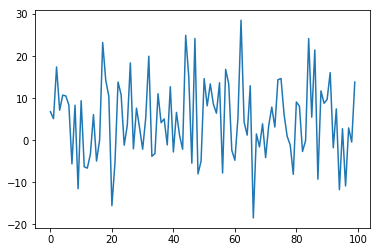

In [2]:
wn = np.random.normal(loc=5, scale=10, size=100)
plt.plot(wn);

In [3]:
def sample_acvf(x,maxlag=None): #function consistent with Eq. (1.36) in textbook
    n = len(x)
    if maxlag==None:
        maxlag=n-1
    xmean = np.mean(x)
    gamma = np.zeros(maxlag)
    for h in range(0,maxlag):
        gamma[h] = 1/n*(x[h:]-xmean)@(x[:n-h]-xmean)
        #gamma[h] = 1/(n-h)*(x[h:]-xmean)@(x[:n-h]-xmean) # alternativ mindre brukt estimator
    return gamma

def sample_acf(x,maxlag=None): # function consistent with Eq. (1.37) in textbook
    acvf = sample_acvf(x,maxlag=maxlag)
    return acvf/acvf[0]

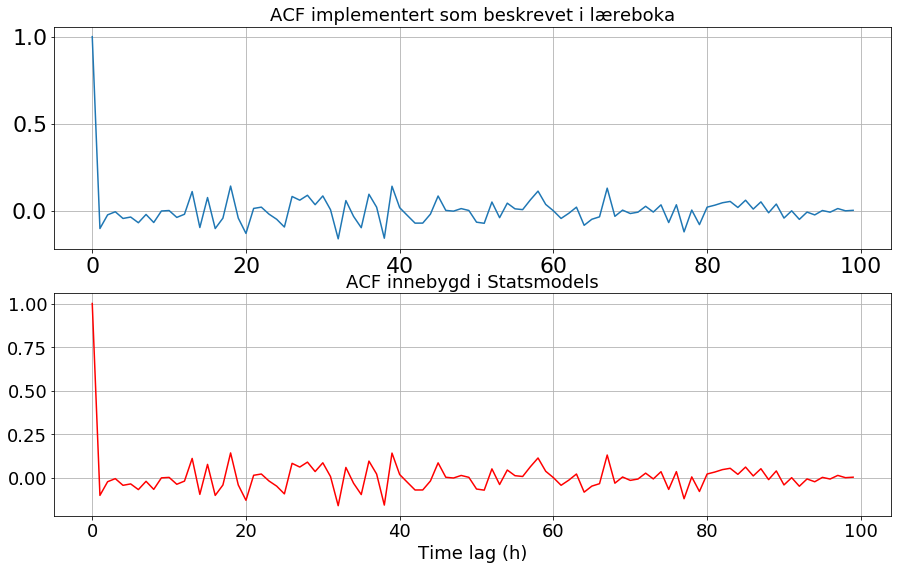

In [4]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize = [15,9])

ax[0].plot(sample_acf(wn,maxlag=100))
ax[0].set_title('ACF implementert som beskrevet i læreboka',fontsize = 18)
ax[0].grid()
ax[0].tick_params(axis='both',labelsize=22)

ax[1].plot(acf(wn,nlags=100),color='red')
ax[1].set_title('ACF innebygd i Statsmodels',fontsize = 18)
ax[1].grid()
ax[1].set_xlabel('Time lag (h)',fontsize = 18)
ax[1].tick_params(axis='both',labelsize=18)

In [5]:
def acf_comp(x): # vi skal ikke bruke denne definisjonen
    n = len(x)
    xmean = np.mean(x)
    Rxx = np.zeros(n)
    for h in range(0,n):
        Rxx[h] = 1/n*(x[h:])@(x[:n-h])
    return Rxx

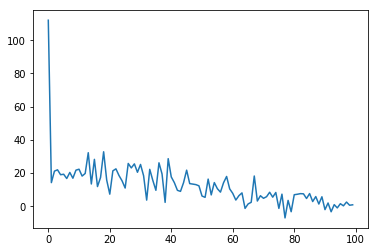

In [6]:
plt.plot(acf_comp(wn));

## ACF eksempler

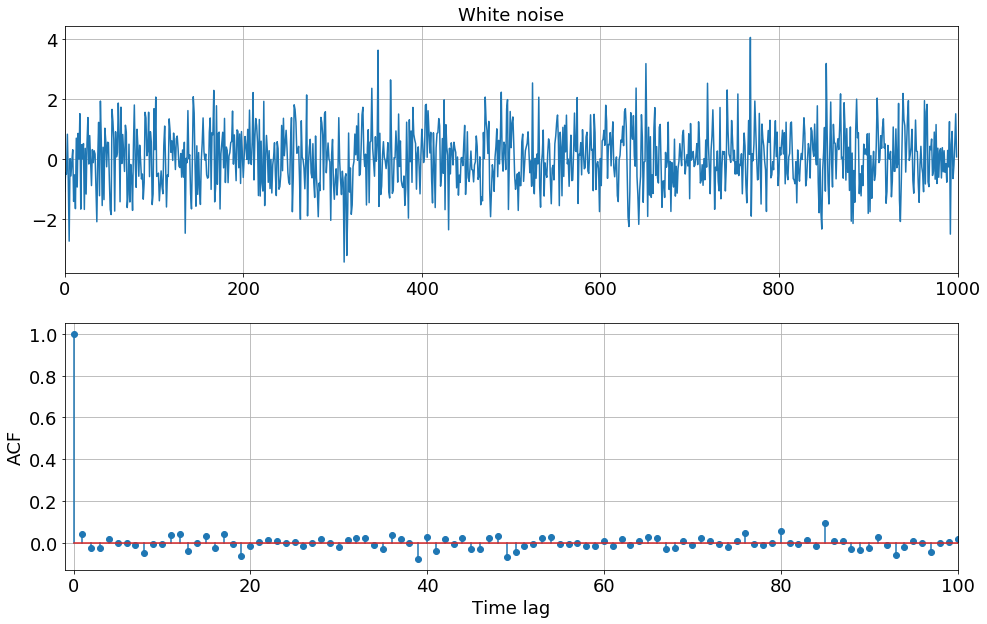

In [7]:
# Hvit støy igjen

n=1000
wn = np.random.normal(loc=0, scale=1, size=n)

fig, ax = plt.subplots(ncols=1,nrows=2,figsize = [16,10])
ax[0].plot(wn);
ax[0].set_title('White noise',fontsize = 18)
ax[0].grid()
ax[0].set_xlim(0,n)
ax[0].tick_params(axis='both',labelsize=18)

ax[1].stem(np.arange(101),acf(wn,nlags=100))
#ax[1].plot(np.arange(101),np.full(101,2/np.sqrt(n)),'--',color='gray')
#ax[1].plot(np.arange(101),np.full(101,-2/np.sqrt(n)),'--',color='gray')
ax[1].grid()
ax[1].set_xlim(-1,100)
ax[1].set_ylabel('ACF',fontsize = 18)
ax[1].set_xlabel('Time lag',fontsize = 18)
ax[1].tick_params(axis='both',labelsize=18)



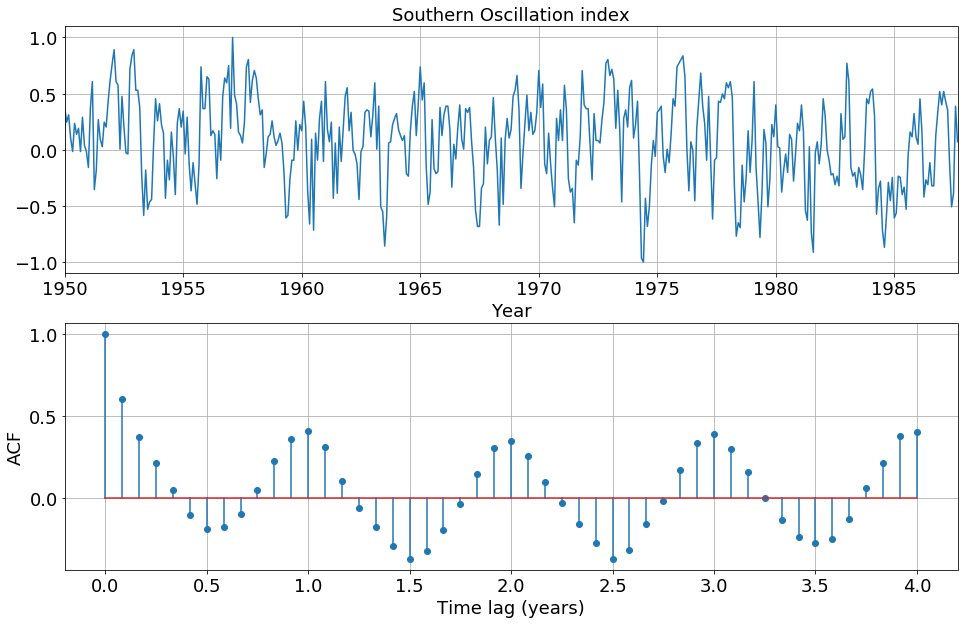

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filedir = '/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Teaching/STA-2003spring2019/Data/saved_from_astsa'
filename = 'soi.txt'

file = os.path.join(filedir, filename)

# load data
datatable = pd.read_table(file,sep='\t',engine='python')
year=datatable.iloc[:,0].values
soi=datatable.iloc[:,1].values

n=len(soi)

fig, ax = plt.subplots(ncols=1,nrows=2,figsize = [16,10])
ax[0].plot(year,soi);
ax[0].set_xlabel('Year',fontsize = 18)
ax[0].set_title('Southern Oscillation index',fontsize = 18)
ax[0].grid()
ax[0].set_xlim(min(year),max(year))
ax[0].tick_params(axis='both',labelsize=18)

ax[1].stem(np.arange(49)/12,acf(soi,nlags=4*12))
#ax[1].plot(np.arange(49)/12,np.full(49,2/np.sqrt(n)),'--',color='gray')
#ax[1].plot(np.arange(49)/12,np.full(49,-2/np.sqrt(n)),'--',color='gray')
ax[1].grid()
ax[1].set_ylabel('ACF',fontsize = 18)
ax[1].set_xlabel('Time lag (years)',fontsize = 18)
ax[1].tick_params(axis='both',labelsize=18)

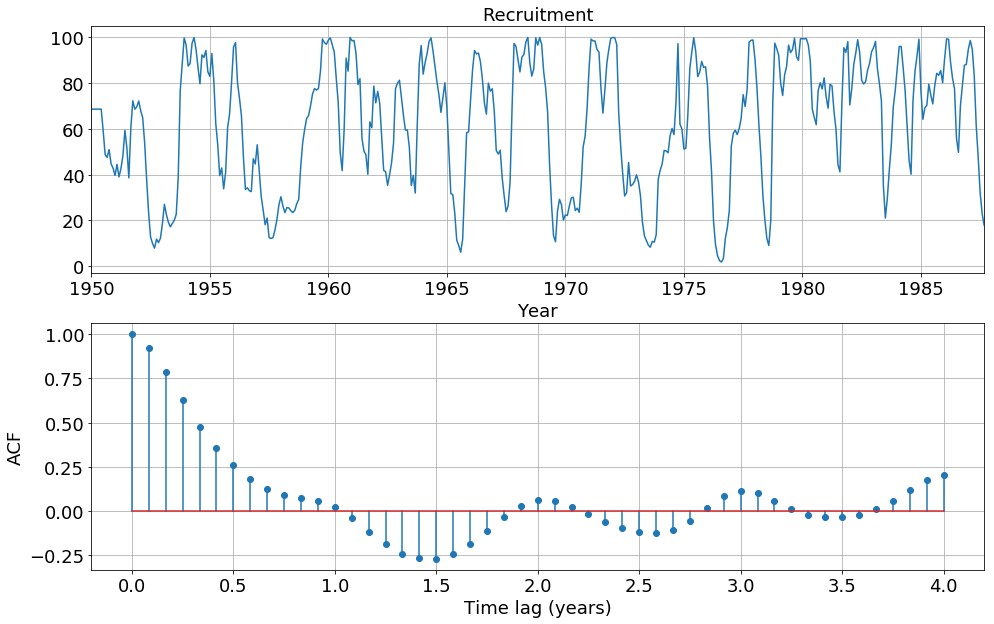

In [9]:
filename = 'rec.txt'
file = os.path.join(filedir, filename)

# load data
datatable = pd.read_table(file,sep='\t',engine='python')
year=datatable.iloc[:,0].values
rec=datatable.iloc[:,1].values

fig, ax = plt.subplots(ncols=1,nrows=2,figsize = [16,10])
ax[0].plot(year,rec);
ax[0].set_xlabel('Year',fontsize = 18)
ax[0].set_title('Recruitment',fontsize = 18)
ax[0].grid()
ax[0].set_xlim(min(year),max(year))
ax[0].tick_params(axis='both',labelsize=18)

ax[1].stem(np.arange(49)/12,acf(rec,nlags=4*12))
#ax[1].plot(np.arange(49)/12,np.full(49,2/np.sqrt(n)),'--',color='gray')
#ax[1].plot(np.arange(49)/12,np.full(49,-2/np.sqrt(n)),'--',color='gray')
ax[1].grid()
ax[1].set_ylabel('ACF',fontsize = 18)
ax[1].set_xlabel('Time lag (years)',fontsize = 18)
ax[1].tick_params(axis='both',labelsize=18)

## Kryss-korrelasjon. Bruker innebygd funksjon, og velger biased estimator

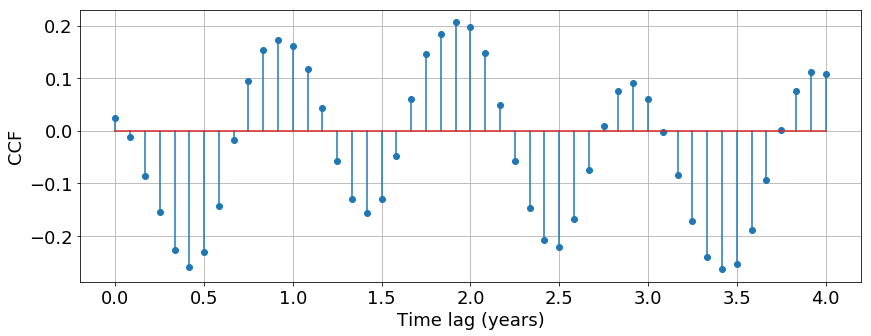

In [10]:
from statsmodels.tsa.stattools import ccf 
crosscorr_xy = ccf(soi,rec,unbiased=False) # vi skal bruke estimatoren som er biased. Merk at denne ikke er default.

maxlag = 12*4

fig, ax = plt.subplots(figsize = [14,5])
plt.stem(np.arange(maxlag+1)/12,crosscorr_xy[:maxlag+1])
ax.grid()
ax.set_ylabel('CCF',fontsize = 18)
ax.set_xlabel('Time lag (years)',fontsize = 18)
ax.tick_params(axis='both',labelsize=18)

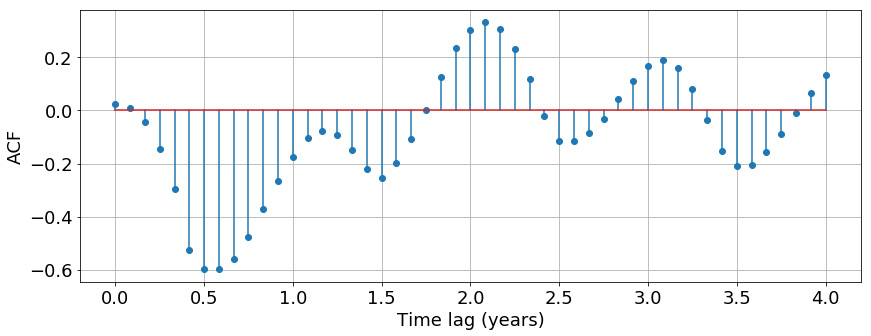

In [11]:
crosscorr_yx = ccf(rec,soi,unbiased=False)
maxlag = 12*4

fig, ax = plt.subplots(figsize = [14,5])
plt.stem(np.arange(maxlag+1)/12,crosscorr_yx[:maxlag+1])
ax.grid()
ax.set_ylabel('ACF',fontsize = 18)
ax.set_xlabel('Time lag (years)',fontsize = 18)
ax.tick_params(axis='both',labelsize=18)

## Kombinerer disse for å se på både positive og negative time lag

In [12]:
print(crosscorr_xy[0])
crosscorr_yx[::-1][-1]

0.024953907377592097


0.024953907377592097

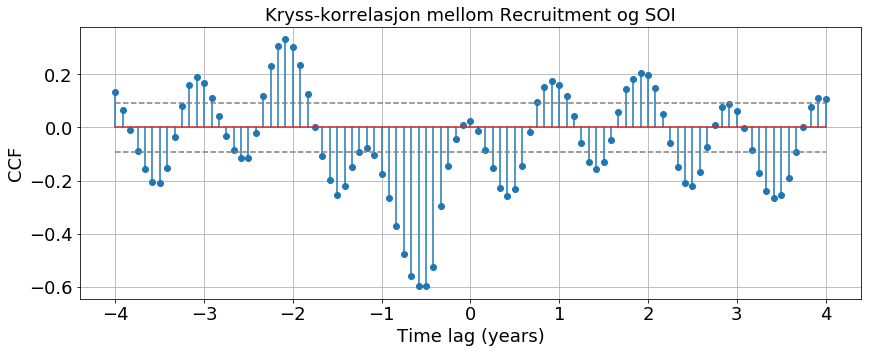

In [13]:
maxlag=12*4
crosscorr = np.concatenate((crosscorr_yx[::-1][-maxlag-1:], crosscorr_xy[1:maxlag+1]))

fig, ax = plt.subplots(figsize = [14,5])
ax.stem(np.arange(-maxlag, maxlag+1)/12,crosscorr);
ax.plot(np.arange(-maxlag, maxlag+1)/12,np.full(2*maxlag+1,2/np.sqrt(n)),'--',color='gray')
ax.plot(np.arange(-maxlag, maxlag+1)/12,np.full(2*maxlag+1,-2/np.sqrt(n)),'--',color='gray')
ax.grid()
ax.set_title('Kryss-korrelasjon mellom Recruitment og SOI',fontsize = 18)
ax.set_ylabel('CCF',fontsize = 18)
ax.set_xlabel('Time lag (years)',fontsize = 18)
ax.tick_params(axis='both',labelsize=18)

Text(0.5, 0, 'Recruitment')

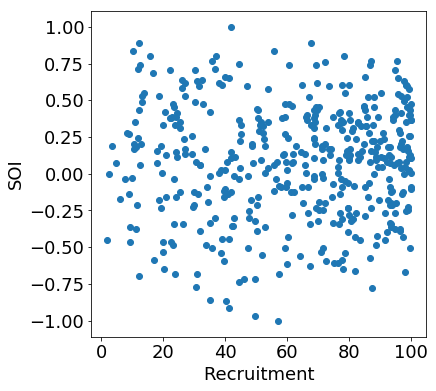

In [14]:
fig, ax = plt.subplots(figsize = [6,6])
ax.scatter(rec,soi); # ved 0 time lag
ax.tick_params(axis='both',labelsize=18)
ax.set_ylabel('SOI',fontsize = 18)
ax.set_xlabel('Recruitment',fontsize = 18)

-0.602452484691205


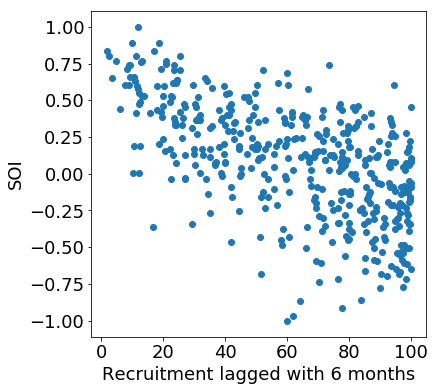

In [15]:
print(np.corrcoef(rec[6:],soi[:-6])[1,0])

fig, ax = plt.subplots(figsize = [6,6])
ax.scatter(rec[6:],soi[:-6]); # ved time lag 6
ax.tick_params(axis='both',labelsize=18)
ax.set_ylabel('SOI',fontsize = 18)
ax.set_xlabel('Recruitment lagged with 6 months',fontsize = 18);